# Mathematics of Machine Learning

## Question Sheet 5 - Problem 5

When implementing descent algorithms one often uses backtracking to select a good step length. Given a descent direction $p_k$, one first tries the step length 1 and then successively scales it down until the sufficient decrease condition is satisfied.
Fixing a decrease parameter c ∈ (0, 1/2) and a scaling parameter s ∈ (0, 1), backtracking works as follows.



*   $\alpha = 1$
*   while $f(x_k+\alpha p_k)> f(x_k)+\alpha \cdot c \dot \langle p_k, \nabla f(x_k) \rangle$: set $\alpha = \alpha \cdot s$
*   $x_{k+1}=x_k+\alpha p_k$

Consider the function
$$f (x) = e^{x_1 +3x_2 −0.1} + e^{x_1 -3x_2 -0.1} + e^{-x_1 -0.1}$$
on $\textbf{R}^2$, with level sets given in the contour plot in Figure 1. Using the starting point $x_0 = (-1, 0.7)^T$, plot the trajectory of

(a) Gradient descent with step length 0.1;

(b) Gradient descent with backtracking, using c = 0.1 and s = 0.5;

# Solution

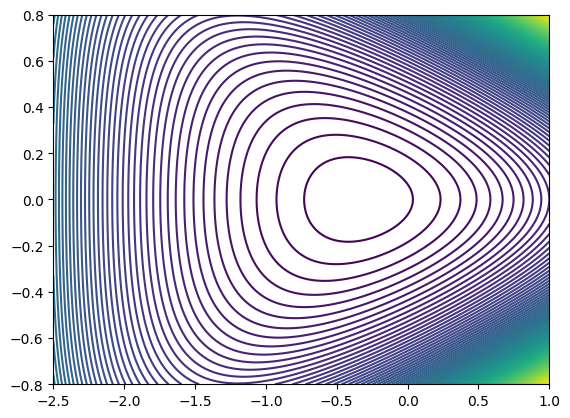

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.linspace(-2.5,1,1000)
y = np.linspace(-0.8,0.8,1000)

X, Y = np.meshgrid(x,y)
Z = np.exp(X+3*Y-0.1)+np.exp(X-3*Y-0.1)+np.exp(-X-0.1)

plt.contour(X,Y,Z, 100, cmap = 'viridis')

plt.show()

# Part A - Gradient Descent
The function $f: \textbf{R}^2→\textbf{R}$ has gradient

$$\nabla f(x) =
   \begin{bmatrix}
           \frac{\partial f}{\partial x_1} \\
           \frac{\partial f}{\partial x_1}
         \end{bmatrix} = \begin{bmatrix}
           e^{x_1+3x_2-0.1}+e^{x_1-3x_2-0.1}-e^{-x_1-0.1} \\
           3e^{x_1+3x_2-0.1}-3e^{x_1-3x_2-0.1}
         \end{bmatrix}
$$
So we can apply gradient descent with $x_{k+1}=x_k-\alpha \nabla f(x_k)$. Set $\alpha = 0.1$ and $x_0 = (-1,0.7)^T$

In [42]:
import numpy as np
import numpy.linalg as la

Define f and all the derivatives

In [43]:

def f0(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)

def df0(x):
    return np.array([np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)-np.exp(-x[0]-0.1),
                     3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1)])

def ddf0(x):
    return np.array([[np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1),
                     3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1)],
                     [3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1),
                    9*np.exp(x[0]+3*x[1]-0.1)+9*np.exp(x[0]-3*x[1]-0.1)]])

Implement the methods


In [44]:
def newton(f, df, ddf, x0, tol, maxiter=100):
    """
    Newton's method with stopping criteria (a)
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        grad = df(x[:,i])
        hess = ddf(x[:,i])
        z = la.solve(hess,grad)
        xnew = x[:,i]-z
        x = np.concatenate((x,xnew.reshape((len(x0), 1))), axis=1)
        i += 1
    return x[:,1:]

def graddesc_bt(f, df, x0, tol, maxiter=100, rho=0.5, c=0.1):
    """
    Gradient descent with backtracking
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        p = -df(x[:,i])
        # Start backtracking
        alpha = 1
        xnew = x[:,i] + alpha*p
        while (f(xnew) >= f(x[:,i]) + alpha*c*np.dot(p, df(x[:,i]))):
            alpha = alpha*rho
            xnew = x[:,i] + alpha*p
        x = np.concatenate((x,xnew.reshape((len(x0),1))), axis=1)
        i += 1
    return x[:,1:]

def graddesc_co(f, df, x0, tol, maxiter=100):
    """
    Gradient descent with constant step length
    """
    alpha = 0.1
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        r = df(x[:,i])
        xnew = x[:,i] - alpha*r
        x = np.concatenate((x,xnew.reshape((len(x0),1))), axis=1)
        i += 1
    return x[:,1:]

Run the methods


In [45]:
tol = 1e-6
x0 = np.array([-1.,0.7])

# Run the three methods
xbt = graddesc_bt(f0, df0, x0, tol)
xco = graddesc_co(f0, df0, x0, tol)
xn = newton(f0, df0, ddf0, x0, tol)

Display everything


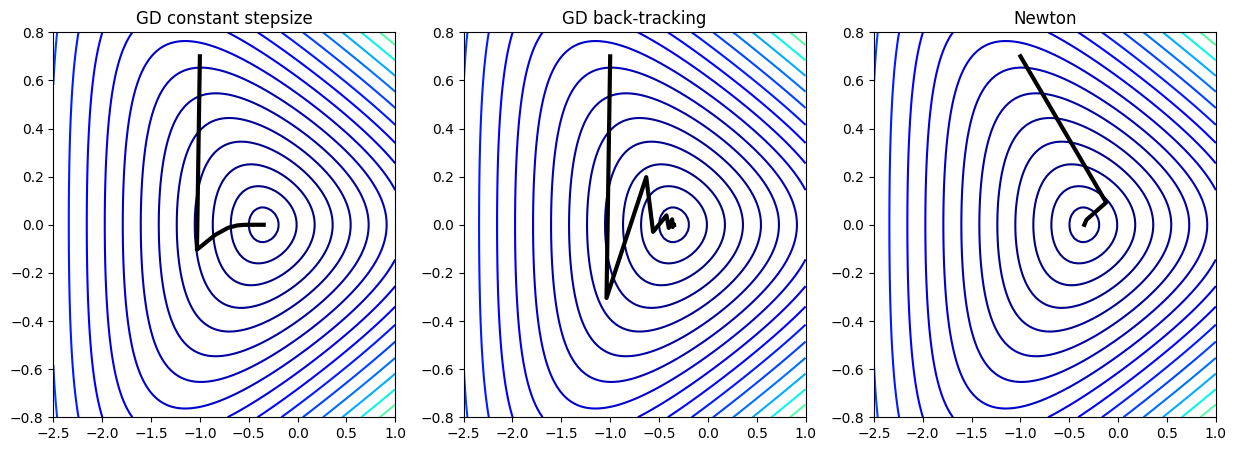

In [47]:
import matplotlib.pyplot as plt
import matplotlib

def f(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)


xvals = np.array([[np.linspace(-4,-0.5,20)], [np.zeros(20)]])
yvals = list(reversed(f(xvals)[0]))



# Create a meshgrid and a contour plot
xx = np.linspace(-2.5,1,100)
yy = np.linspace(-0.8,0.8,100)
X, Y = np.meshgrid(xx, yy)
# The construction inside looks odd: we want to transform the set of input pairs given
# by the meshgrid into a 2 x n array of values that we can apply f to (calling f on such
# an array will apply the function f to each column)
Z = f(np.dstack((X,Y)).reshape((X.size, 2)).transpose())
# the result of applying f is a long list, but we want a matrix
Z = Z.reshape(X.shape)

cmap = matplotlib.colormaps["jet"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].contour(X, Y, Z, yvals, cmap = cmap)
ax[0].plot(xco[0,:], xco[1,:], color='black', linewidth=3)
ax[0].set_title('GD constant stepsize')

ax[1].contour(X, Y, Z, yvals, cmap = cmap)
ax[1].plot(xbt[0,:], xbt[1,:], color='black', linewidth=3)
ax[1].set_title('GD back-tracking')


ax[2].contour(X, Y, Z, yvals, cmap = cmap)
ax[2].plot(xn[0,:], xn[1,:], color='black', linewidth=3)
ax[2].set_title('Newton')

plt.show()